# **Business Problem**: Analyze Netflix content to identify trends in shows vs movies, regional preferences, release patterns, and provide data-driven recommendations on content production and market expansion.

# 1. Import Libraries

In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# 2. Load Data

In [676]:
df = pd.read_csv('netflix_titles.csv')

# 3. Data Types & Statistical Summary

#### A. Check Dataset Shape and Structure

In [679]:
print("Dataset Shape (rows, columns):")
print(df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types of Each Column:")
print(df.dtypes)

Dataset Shape (rows, columns):
(8807, 12)

Column Names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data Types of Each Column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


#### B. Preview the Data

In [681]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [682]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [683]:
df.sample(5, random_state=42)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
3362,s3363,Movie,Arsenio Hall: Smart & Classy,Brian Volk-Weiss,Arsenio Hall,United States,"October 29, 2019",2019,TV-MA,63 min,Stand-Up Comedy,"In his first stand-up special, Arsenio Hall di..."
5494,s5495,TV Show,Kazoops!,NaN,"Reece Pockney, Scott Langley, Alex Babic, Gemm...",Australia,"May 5, 2017",2017,TV-Y,3 Seasons,Kids' TV,Music meets imagination in this inventive anim...
1688,s1689,TV Show,We Are the Champions,NaN,NaN,United States,"November 17, 2020",2020,TV-MA,1 Season,"Docuseries, Reality TV","Explore an array of unique competitions, from ..."
1349,s1350,TV Show,"Pablo Escobar, el patrÃ³n del mal",NaN,"AndrÃ©s Parra, Angie Cepeda, Cecilia Navia, Vi...",Colombia,"February 3, 2021",2012,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",From his days as a petty thief to becoming hea...


#### C. Check Missing Values

In [685]:
print("Missing Values per Column:")
print(df.isna().sum())
print("\nPercentage of Missing Values:")
print((df.isna().mean() * 100).round(2))

Missing Values per Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Percentage of Missing Values:
show_id          0.00
type             0.00
title            0.00
director        29.91
cast             9.37
country          9.44
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64


#### D. Summary Statistics

In [687]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


#### E. Check for Duplicates

In [689]:
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
0


#### F. Data Quality Checks

In [691]:
print("Check for Extra Spaces in String Columns:")
for col in df.select_dtypes(include='object').columns:
    has_spaces = df[col].str.contains(r'^\s+|\s+$', na=False).sum()
    print(f"Leading/trailing spaces in {col}: {has_spaces}")

Check for Extra Spaces in String Columns:
Leading/trailing spaces in show_id: 0
Leading/trailing spaces in type: 0
Leading/trailing spaces in title: 1
Leading/trailing spaces in director: 0
Leading/trailing spaces in cast: 2
Leading/trailing spaces in country: 0
Leading/trailing spaces in date_added: 88
Leading/trailing spaces in rating: 0
Leading/trailing spaces in duration: 0
Leading/trailing spaces in listed_in: 0
Leading/trailing spaces in description: 0


# 4. Cleaning, Udating Missing Values & Conversion of **Attributes**

#### A. Removing Extra Spaces

In [694]:
df['title'] = df['title'].str.strip()
df['date_added'] = df['date_added'].str.strip()
df['cast'] = df['cast'].str.strip()

#### B. Updating the date columns

In [696]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y")


#### C. Separating duration for *Movies* and *TV Show*  

In [698]:
df['duration_min'] = df.loc[df['type'] == 'Movie', 'duration'].str.extract('(\d+)', expand=False).astype('float64')
df['seasons'] = df.loc[df['type'] == 'TV Show', 'duration'].str.extract('(\d+)', expand=False).astype('float64')
df.drop('duration', axis=1, inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/q0/wp38h2m52jgdzqg0dwccdfw40000gn/T/ipykernel_9040/2588928879.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_min'] = df.loc[df['type'] == 'Movie', 'duration'].str.extract('(\d+)', expand=False).astype('float64')
/var/folders/q0/wp38h2m52jgdzqg0dwccdfw40000gn/T/ipykernel_9040/2588928879.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['seasons'] = df.loc[df['type'] == 'TV Show', 'duration'].str.extract('(\d+)', expand=False).astype('float64')


#### D. Handling Missing/Null Values

In [700]:
# Step 1: Handle null values in categorical variables
categorical_columns = {

    'director': 'Unknown Director',
    'cast': 'Unknown Actor',
    'country': 'Unknown Country',
    'date_added': 'Unknown Date',
    'rating': 'Unknown Rating'
}

for column, unknown_value in categorical_columns.items():
    df[column] = df[column].fillna(unknown_value)

# Step 2: Handle null values in continuous variables

continuous_columns = ['duration_min', 'seasons']
for column in continuous_columns:
    df[column] = df[column].fillna(0)

#### G. For 3 colums we saw data is getting shifted so updated it. I we found this in non graphical anlysis(Adding this code here in cleaning data section)

In [702]:
df.loc[df['title'].str.contains('Louis C.K.', na=False), 'rating'] = 'Unknown Rating'
df.loc[df['title'].str.contains('Louis C.K. 2017', na=False), 'duration_min'] = 74
df.loc[df['title'].str.contains('Louis C.K.: Hilarious', na=False), 'duration_min'] = 84
df.loc[df['title'].str.contains('Louis C.K.: Live at the Comedy Store', na=False), 'duration_min'] = 66

#### E. Convert 'type' and 'rating' to category

In [704]:
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')

#### F. Converting 'genres', 'director', 'cast' and ''countries' to lists

In [706]:
df['genres'] = df['listed_in'].str.split(', ')
df['genres'] = df['genres'].apply(lambda x: [i.strip() for i in x])
df.drop('listed_in', axis=1, inplace=True)

df['directors'] = df['director'].str.split(', ')
df['directors'] = df['directors'].apply(lambda x: [i.strip() for i in x])
df.drop('director', axis=1, inplace=True)

df['cast_list'] = df['cast'].str.split(', ')
df['cast_list'] = df['cast_list'].apply(lambda x: [i.strip() for i in x])
df.drop('cast', axis=1, inplace=True)

df['countries'] = df['country'].str.split(', ')
df['countries'] = df['countries'].apply(lambda x: [i.strip() for i in x])
df.drop('country', axis=1, inplace=True)

#### H. Checking cleaned data

In [708]:
df.describe(include='all')

,show_id,type,title,date_added,release_year,rating,description,duration_min,seasons,genres,directors,cast_list,countries
count,8807,8807,8807,8807,8807.000000,8807,8807,8807.000000,8807.000000,8807,8807,8807,8807
unique,8807,2,8807,1715,NaN,15,8775,NaN,NaN,514,4529,7693,749
top,s1,Movie,Dick Johnson Is Dead,2020-01-01 00:00:00,NaN,TV-MA,"Paranormal activity at a lush, abandoned prope...",NaN,NaN,"[Dramas, International Movies]",[Unknown Director],[Unknown Actor],[United States]
freq,1,6131,1,110,NaN,3207,4,NaN,NaN,362,2634,825,2818
mean,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,69.312252,0.536278,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,51.519154,1.191620,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,88.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,106.000000,1.000000,NaN,NaN,NaN,NaN


In [709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   date_added    8807 non-null   object  
 4   release_year  8807 non-null   int64   
 5   rating        8807 non-null   category
 6   description   8807 non-null   object  
 7   duration_min  8807 non-null   float64 
 8   seasons       8807 non-null   float64 
 9   genres        8807 non-null   object  
 10  directors     8807 non-null   object  
 11  cast_list     8807 non-null   object  
 12  countries     8807 non-null   object  
dtypes: category(2), float64(2), int64(1), object(8)
memory usage: 775.0+ KB


In [710]:
df.head()

,show_id,type,title,date_added,release_year,rating,description,duration_min,seasons,genres,directors,cast_list,countries
0,s1,Movie,Dick Johnson Is Dead,2021-09-25 00:00:00,2020,PG-13,"As her father nears the end of his life, filmm...",90.0,0.0,[Documentaries],[Kirsten Johnson],[Unknown Actor],[United States]
1,s2,TV Show,Blood & Water,2021-09-24 00:00:00,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",0.0,2.0,"[International TV Shows, TV Dramas, TV Mysteries]",[Unknown Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa]
2,s3,TV Show,Ganglands,2021-09-24 00:00:00,2021,TV-MA,To protect his family from a powerful drug lor...,0.0,1.0,"[Crime TV Shows, International TV Shows, TV Ac...",[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown Country]
3,s4,TV Show,Jailbirds New Orleans,2021-09-24 00:00:00,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",0.0,1.0,"[Docuseries, Reality TV]",[Unknown Director],[Unknown Actor],[Unknown Country]
4,s5,TV Show,Kota Factory,2021-09-24 00:00:00,2021,TV-MA,In a city of coaching centers known to train I...,0.0,2.0,"[International TV Shows, Romantic TV Shows, TV...",[Unknown Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India]


In [711]:
# Non-Graphical Analysis

#### Value counts

In [713]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [714]:
df['rating'].value_counts()

rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
Unknown Rating       7
TV-Y7-FV             6
NC-17                3
UR                   3
Name: count, dtype: int64

In [715]:
df['release_year'].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [716]:
#Countries and there contribution in numbers

country_counts = df['countries'].explode().value_counts()
country_counts


countries
United States      3689
India              1046
Unknown Country     831
United Kingdom      804
Canada              445
                   ... 
Bermuda               1
Ecuador               1
Armenia               1
Mongolia              1
Montenegro            1
Name: count, Length: 128, dtype: int64

In [717]:
#Count of each genres

genre_counts = df['genres'].explode().value_counts()
genre_counts


genres
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                

In [718]:
#Director and there contributions in number

directors_counts = df['directors'].explode().value_counts()
directors_counts


directors
Unknown Director    2634
Rajiv Chilaka         22
Jan Suter             21
RaÃºl Campos          19
Suhas Kadav           16
                    ... 
Raymie Muzquiz         1
Stu Livingston         1
Joe Menendez           1
Eric Bross             1
Mozez Singh            1
Name: count, Length: 4994, dtype: int64

In [719]:
#Cast and there contributions in number

cast_counts = df['cast_list'].explode().value_counts()
cast_counts

cast_list
Unknown Actor              825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: count, Length: 36440, dtype: int64

In [720]:
# Removing Default 0.0 as those records represent 'Movie'
Seasons = df[df['seasons'] != 0]
Seasons['seasons'].value_counts()

seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
15.0       2
12.0       2
11.0       2
17.0       1
Name: count, dtype: int64

#### Unique Attributes

In [722]:
list_columns = ['cast_list', 'genres', 'directors', 'countries']
non_list_columns = [col for col in df.columns if col not in list_columns]
unique_counts = df[non_list_columns].nunique().sort_values(ascending=False)
unique_counts

show_id         8807
title           8807
description     8775
date_added      1715
duration_min     206
release_year      74
seasons           16
rating            15
type               2
dtype: int64

In [723]:
list_columns = ['cast_list', 'genres', 'directors', 'countries']
unique_counts = {}

for col in list_columns:
    unique_counts[col] = df[col].explode().dropna().nunique()

unique_counts = pd.Series(unique_counts)
print("Unique value counts for list columns:")
print(unique_counts)

Unique value counts for list columns:
cast_list    36440
genres          42
directors     4994
countries      128
dtype: int64


# Visual Analysis

#### Continuous Variables Analysis

In [726]:
# # Preprocessing: Unnest multi-value columns
df_exploded = df.copy()
for col in ['genres', 'countries', 'directors', 'cast_list']:
    df_exploded = df_exploded.explode(col)

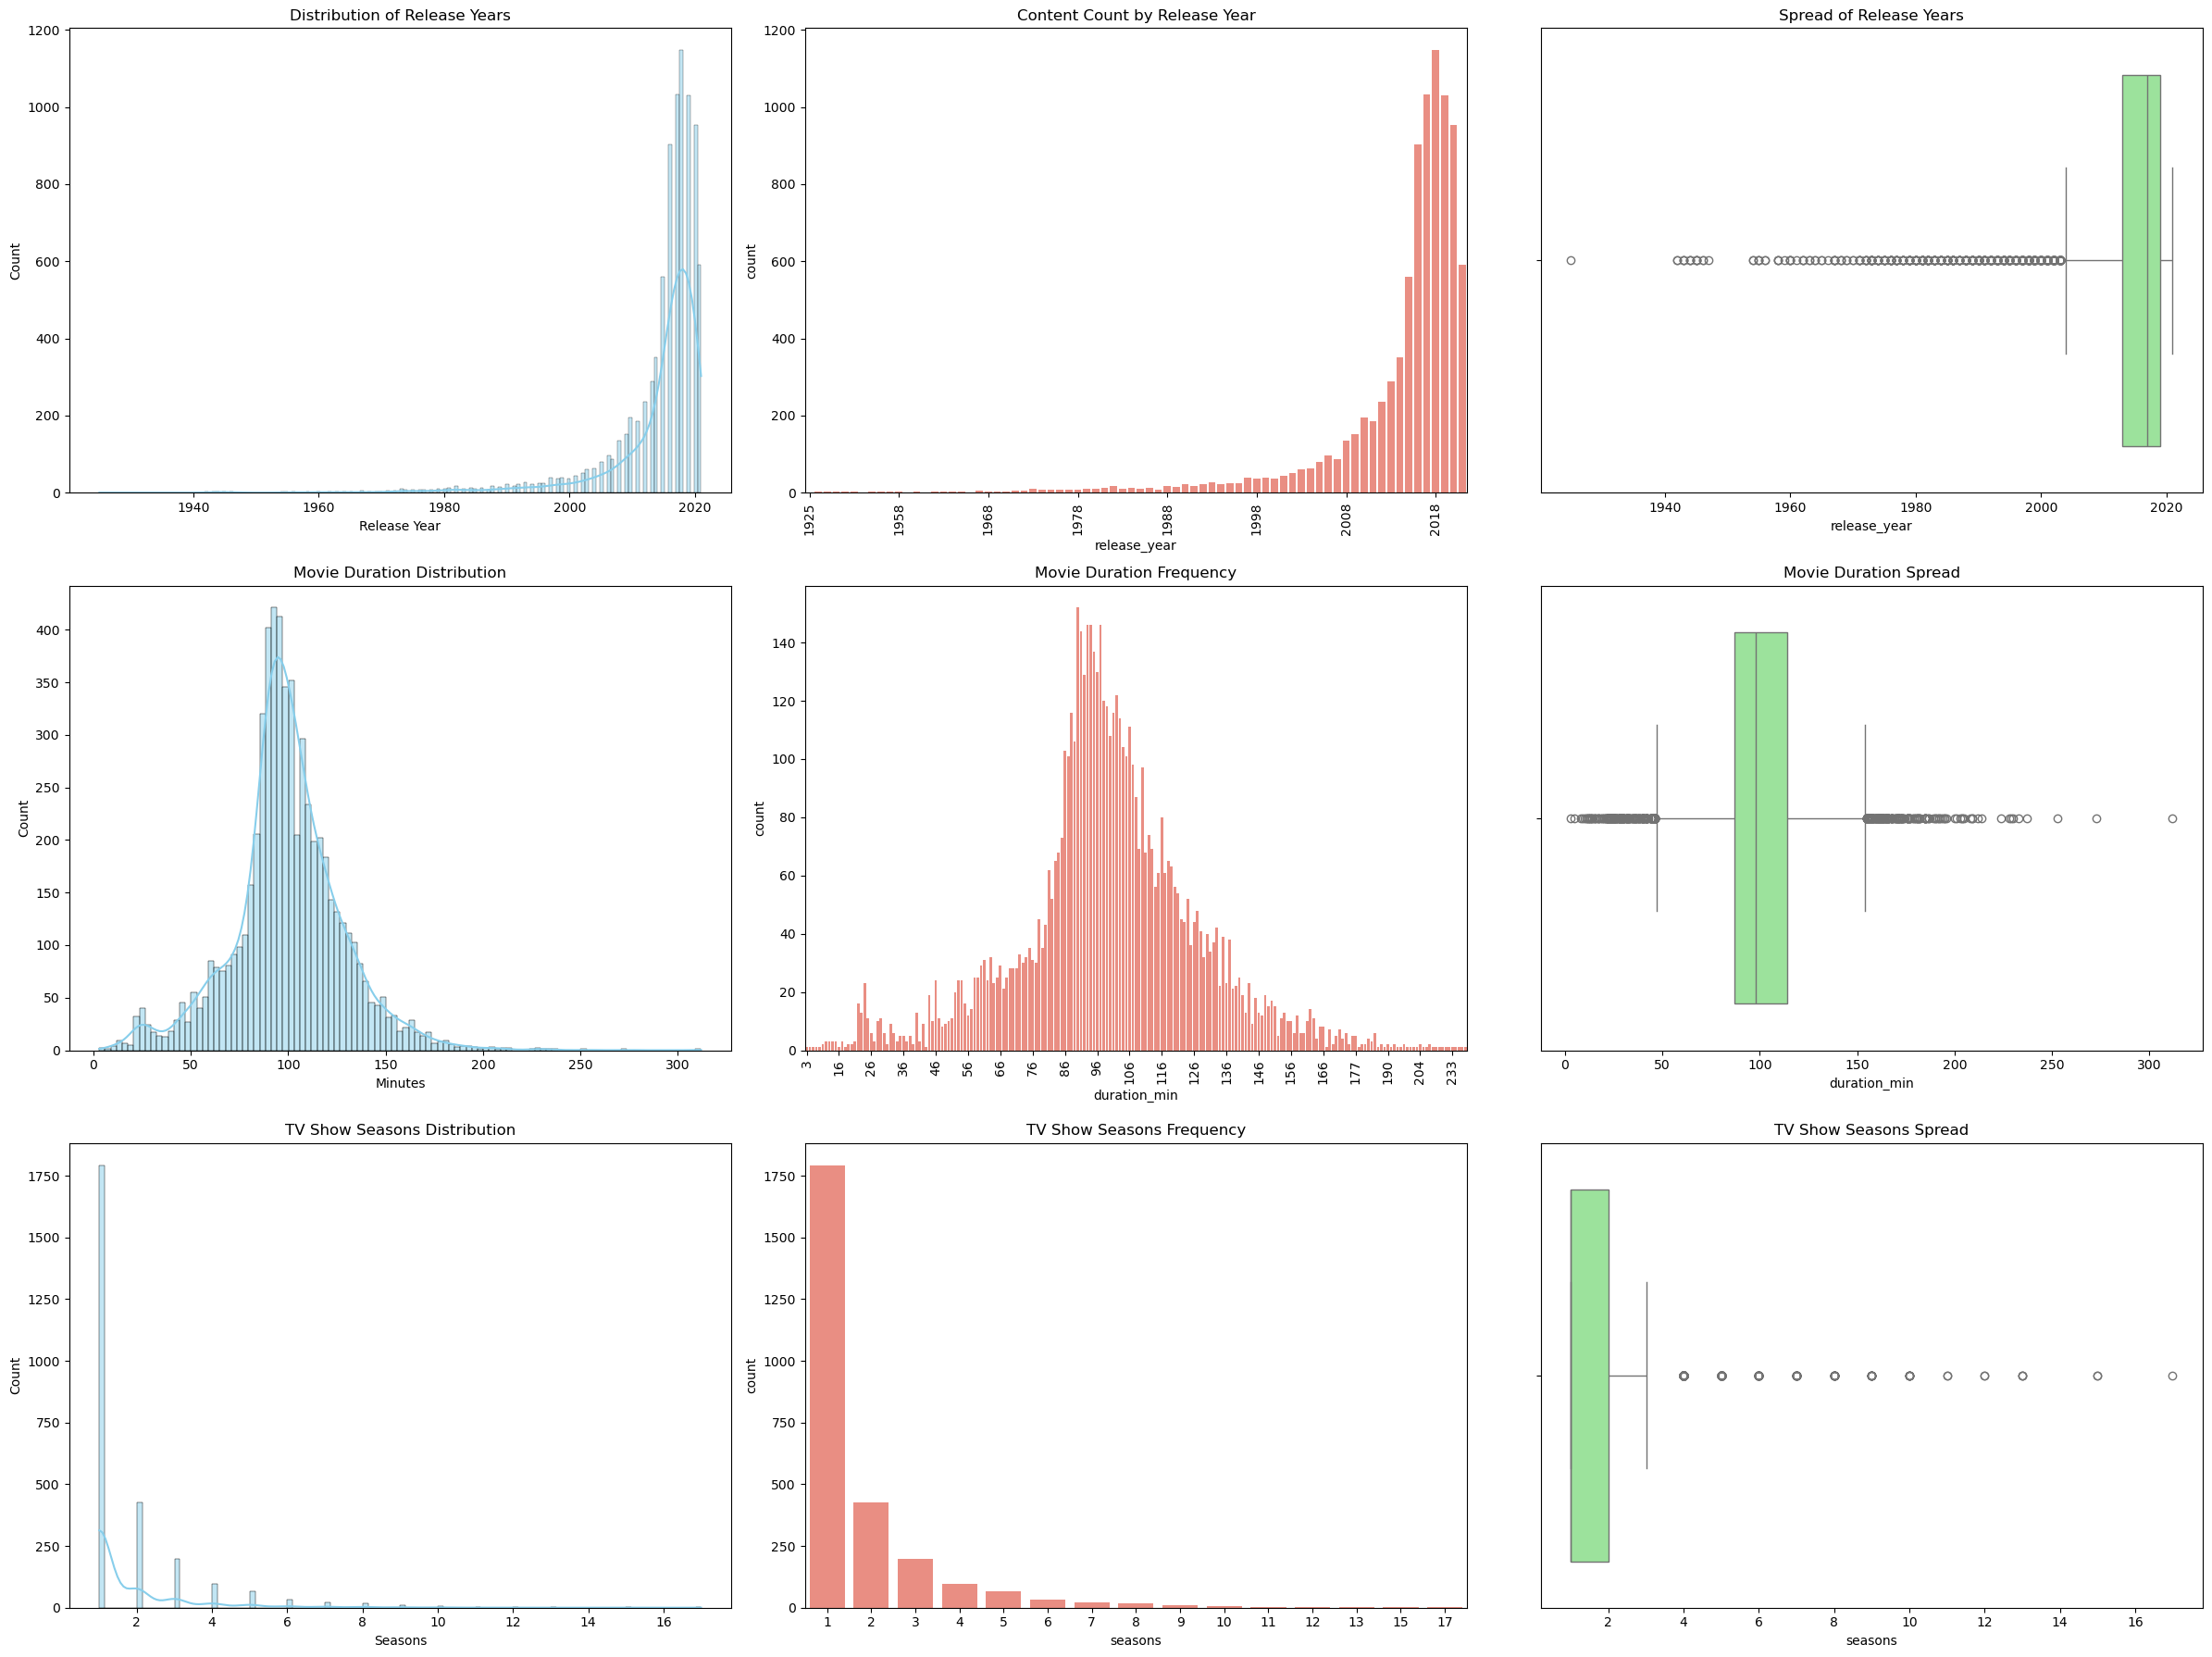

In [727]:
cont_vars = ['release_year', 'duration_min', 'seasons']
plt.figure(figsize=(24, 18))

# Release Year Analysis
plt.subplot(3, 3, 1)
sns.histplot(df['release_year'], kde=True, color='skyblue')
plt.title('Distribution of Release Years', fontsize=12)
plt.xlabel('Release Year')

plt.subplot(3, 3, 2)
ax2=sns.countplot(x=df['release_year'], color='salmon')
plt.title('Content Count by Release Year', fontsize=12)
ax2.xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=90)

plt.subplot(3, 3, 3)
sns.boxplot(x=df['release_year'], color='lightgreen')
plt.title('Spread of Release Years', fontsize=12)

# Duration Analysis (Movies)
plt.subplot(3, 3, 4)
sns.histplot(df[df['type']=='Movie']['duration_min'], kde=True, color='skyblue')
plt.title('Movie Duration Distribution', fontsize=12)
plt.xlabel('Minutes')

plt.subplot(3, 3, 5)
ax5=sns.countplot(x=df[df['type']=='Movie']['duration_min'].astype(int), color='salmon')
plt.title('Movie Duration Frequency', fontsize=12)
ax5.xaxis.set_major_locator(MultipleLocator(10))
plt.xticks(rotation=90)

plt.subplot(3, 3, 6)
sns.boxplot(x=df[df['type']=='Movie']['duration_min'], color='lightgreen')
plt.title('Movie Duration Spread', fontsize=12)

# Seasons Analysis (TV Shows)
plt.subplot(3, 3, 7)
sns.histplot(df[df['type']=='TV Show']['seasons'], kde=True, color='skyblue')
plt.title('TV Show Seasons Distribution', fontsize=12)
plt.xlabel('Seasons')

plt.subplot(3, 3, 8)
sns.countplot(x=df[df['type']=='TV Show']['seasons'].astype(int), color='salmon')
plt.title('TV Show Seasons Frequency', fontsize=12)

plt.subplot(3, 3, 9)
sns.boxplot(x=df[df['type']=='TV Show']['seasons'], color='lightgreen')
plt.title('TV Show Seasons Spread', fontsize=12)

plt.tight_layout()
plt.show()

#### Categorical variable Analysis

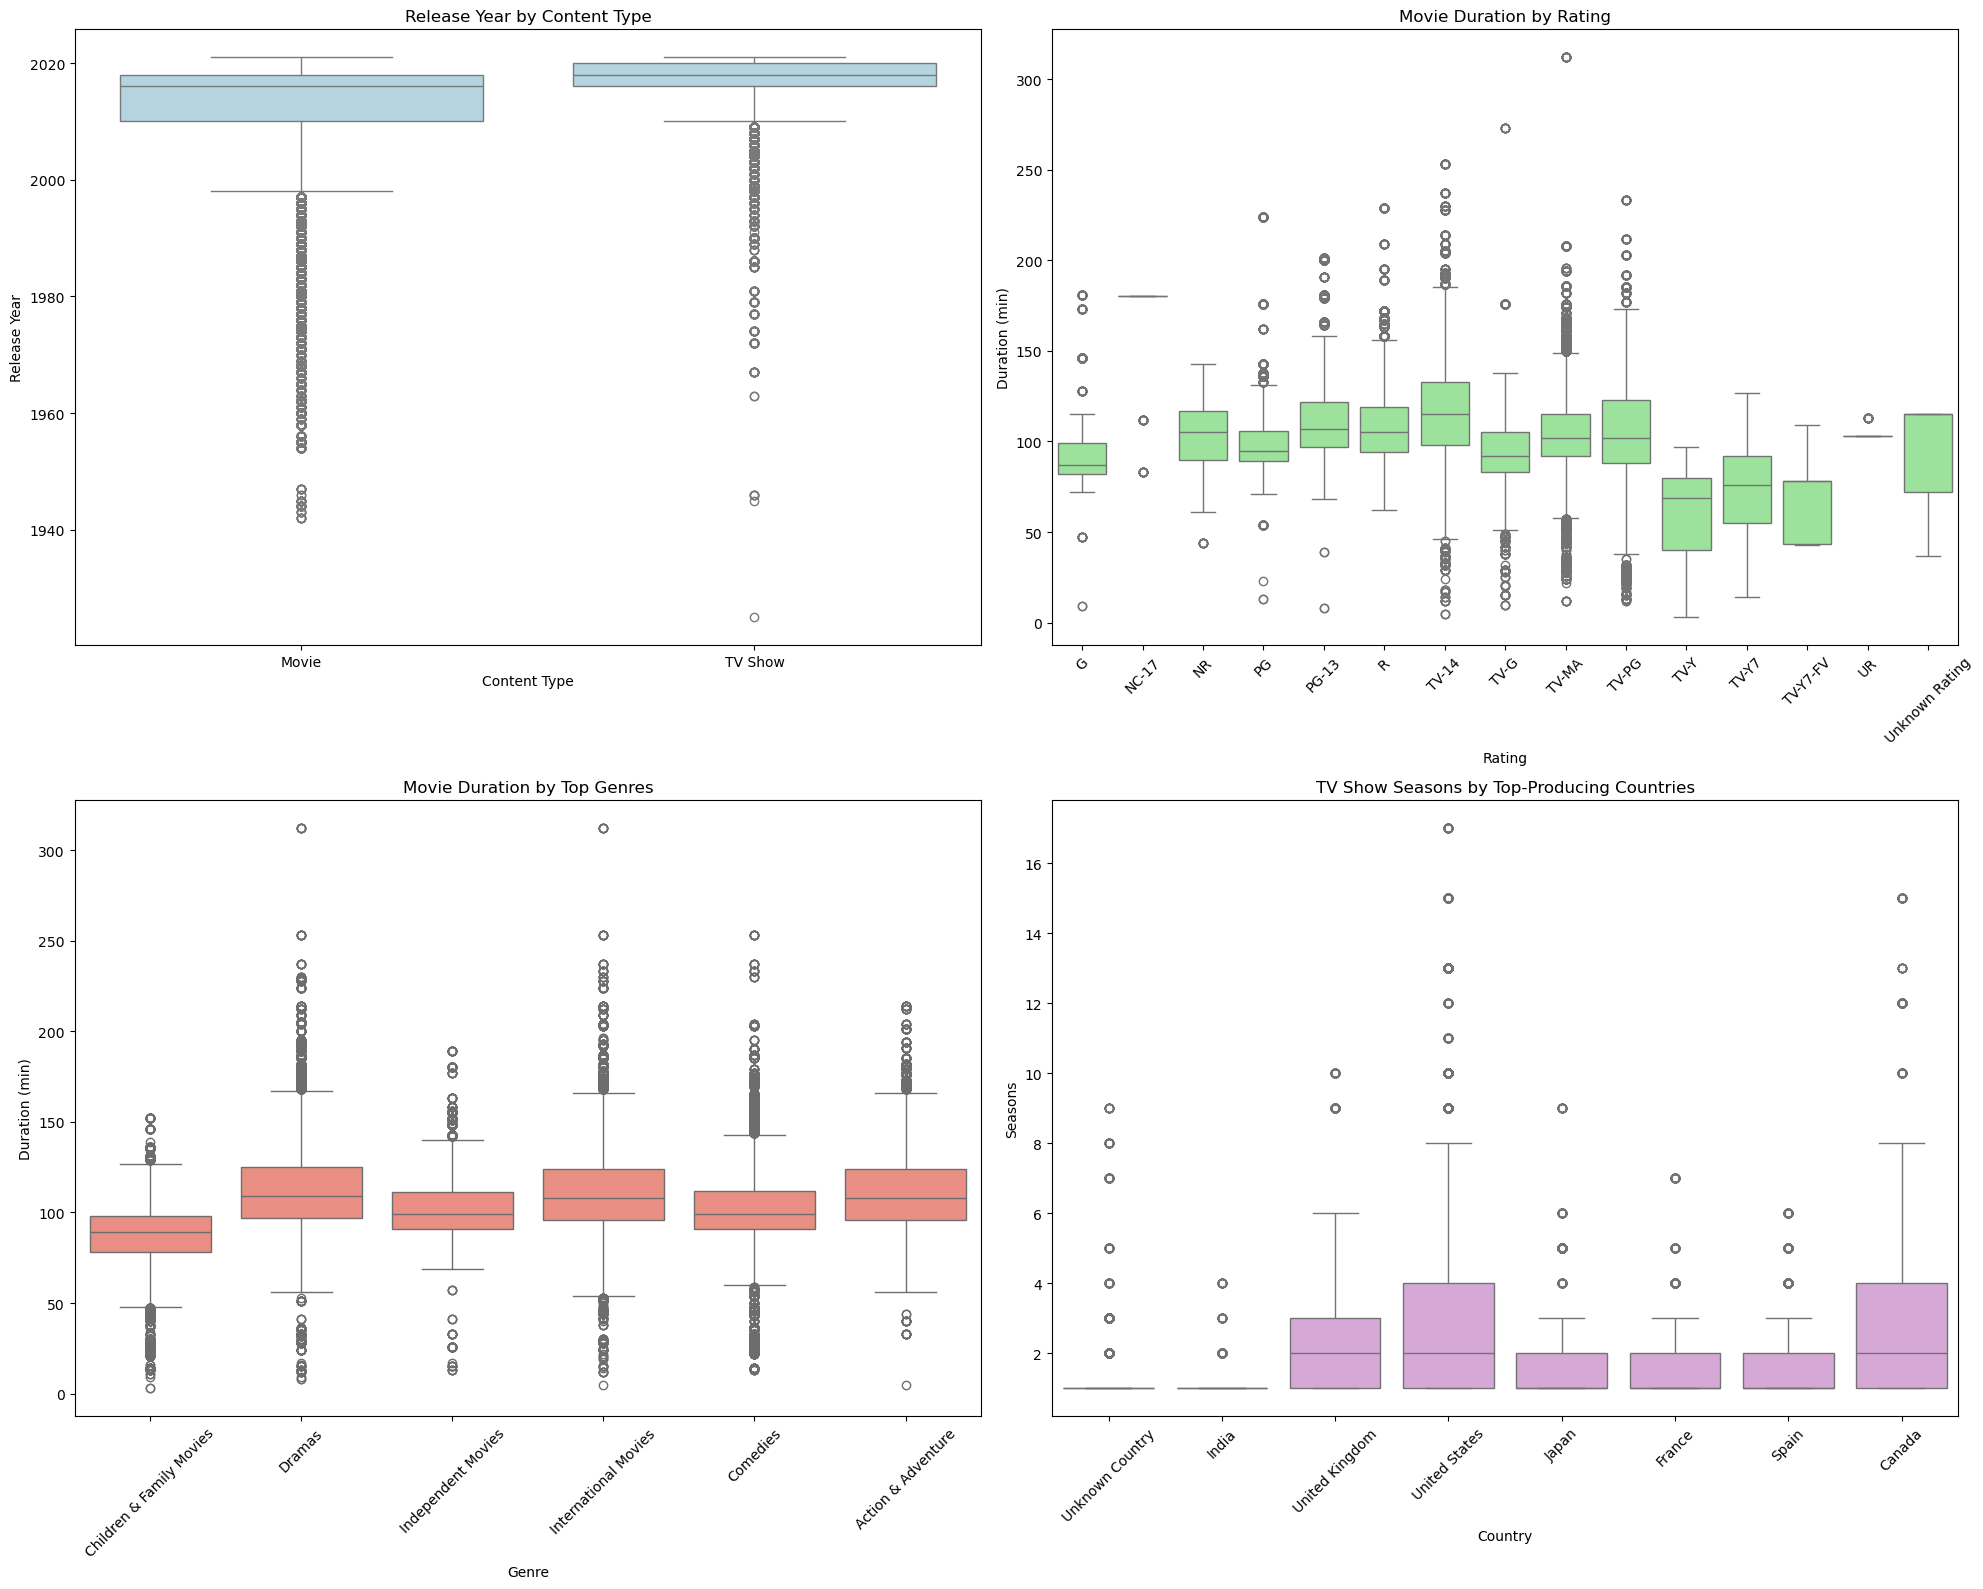

In [729]:
plt.figure(figsize=(20, 16))

# 1) Type vs. Release Year
plt.subplot(2, 2, 1)
sns.boxplot(x='type', y='release_year',
            data=df_exploded,
            color='lightblue')
plt.title('Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')

# 2) Rating vs. Movie Duration
plt.subplot(2, 2, 2)
sns.boxplot(x='rating', y='duration_min',
            data=df_exploded[df_exploded['type']=='Movie'],
            color='lightgreen')
plt.title('Movie Duration by Rating')
plt.xlabel('Rating')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)

# 3) Genre vs. Movie Duration (top 8 genres)
top_genres = df_exploded['genres'].value_counts().nlargest(8).index
plt.subplot(2, 2, 3)
sns.boxplot(x='genres', y='duration_min',
            data=df_exploded[
                (df_exploded['type']=='Movie')
                & (df_exploded['genres'].isin(top_genres))
            ],
            color='salmon')
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)

# 4) Country vs. TV Seasons (top 8 countries)
top_countries = df_exploded['countries'].value_counts().nlargest(8).index
plt.subplot(2, 2, 4)
sns.boxplot(x='countries', y='seasons',
            data=df_exploded[
                (df_exploded['type']=='TV Show')
                & (df_exploded['countries'].isin(top_countries))
            ],
            color='plum')
plt.title('TV Show Seasons by Top-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Seasons')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Correlation

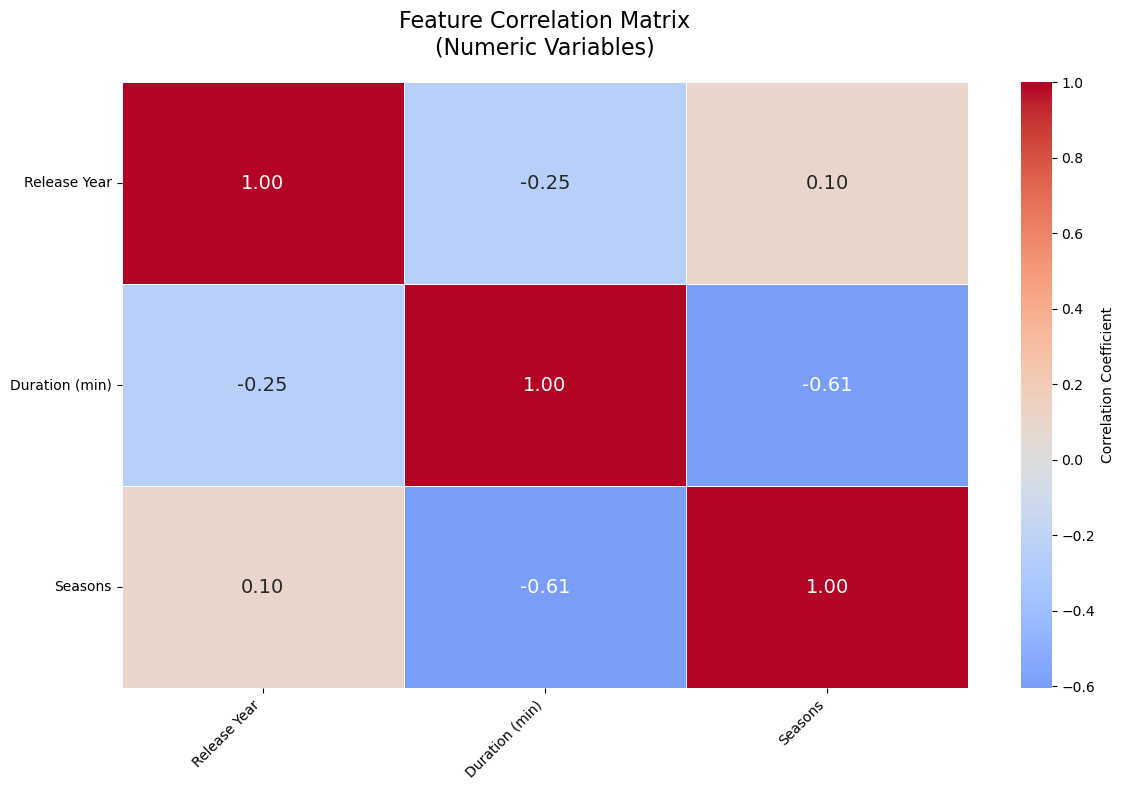

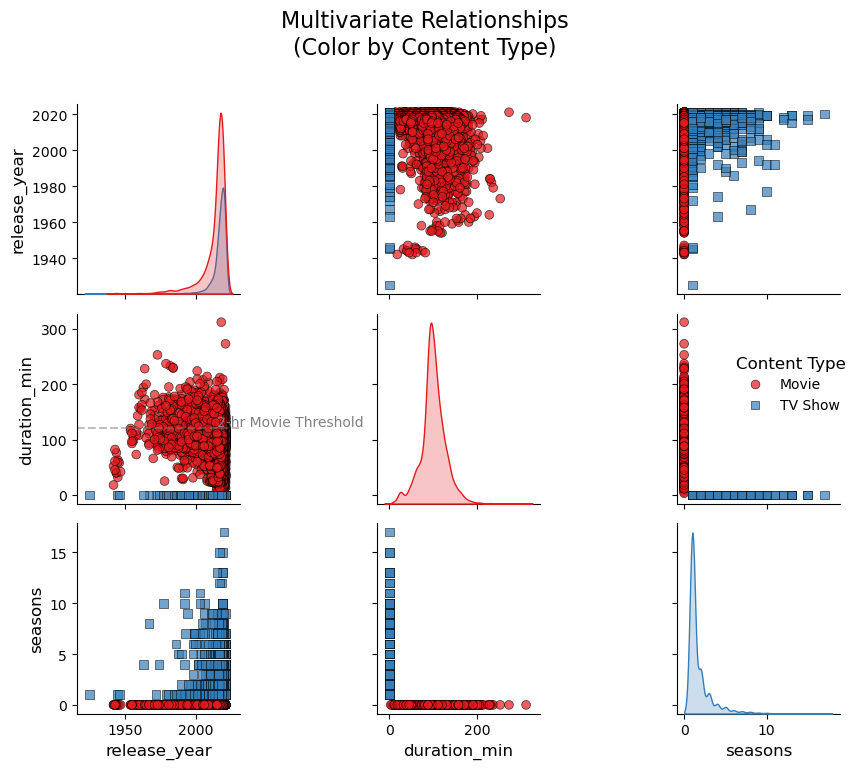

In [731]:
plt.figure(figsize=(12, 8))
corr_matrix = df[['release_year', 'duration_min', 'seasons']].corr()

# Enhanced Heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
                      fmt=".2f", linewidths=.5, center=0,
                      annot_kws={"size": 14}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix\n(Numeric Variables)', fontsize=16, pad=20)
heatmap.set_xticklabels(['Release Year', 'Duration (min)', 'Seasons'], rotation=45, ha='right')
heatmap.set_yticklabels(['Release Year', 'Duration (min)', 'Seasons'], rotation=0)
plt.tight_layout()
plt.show()

# Advanced Pairplot
pair_grid = sns.pairplot(df[['release_year', 'duration_min', 'seasons', 'type']], 
                         hue='type', palette='Set1', 
                         plot_kws={'s': 40, 'alpha': 0.7, 'edgecolor': 'k'},
                         diag_kind='kde', markers=['o', 's'])

# Add reference lines and annotations
pair_grid.axes[1,0].axhline(120, color='gray', ls='--', alpha=0.5)
pair_grid.axes[1,0].text(2015, 125, "2-hr Movie Threshold", color='gray')

# Style enhancements
pair_grid.fig.suptitle('Multivariate Relationships\n(Color by Content Type)', y=1.02, fontsize=16)
pair_grid._legend.set_title('Content Type')
pair_grid._legend.get_title().set_fontsize(12)

for ax in pair_grid.axes.flatten():
    ax.tick_params(labelsize=10)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

plt.tight_layout()
plt.show()

# Missing Value & Outlier check

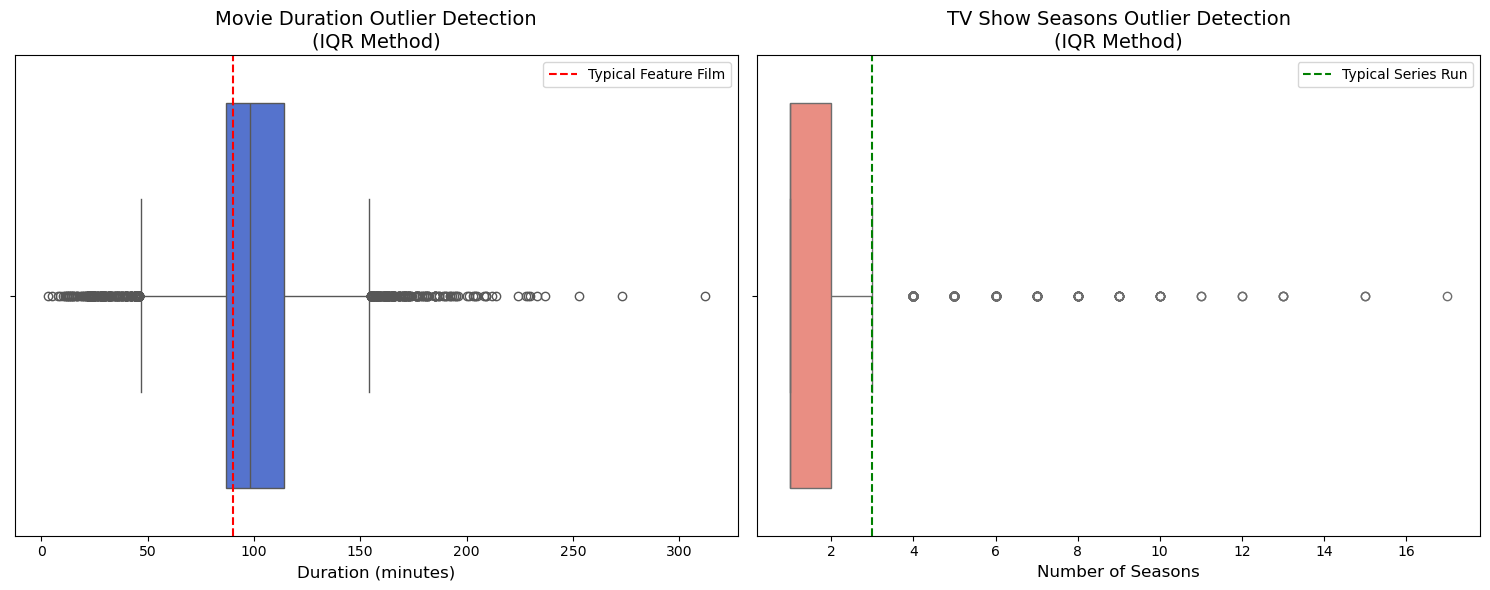


Missing Values and Outliers Summary:


,Feature,Data Type,Missing Values,Zeros,Outliers
0,duration_min,Continuous (Movies),0,"2,676",450
1,seasons,Discrete (TV Shows),0,"6,131",259


In [733]:
# Create analysis dataframe
analysis_df = pd.DataFrame({
    'Feature': ['duration_min', 'seasons'],
    'Data Type': ['Continuous (Movies)', 'Discrete (TV Shows)'],
    'Missing Values': [df['duration_min'].isnull().sum(), 
                      df['seasons'].isnull().sum()],
    'Zeros': [(df['duration_min'] == 0).sum(),
             (df['seasons'] == 0).sum()]
})

# Calculate outliers using Tukey's method
def calculate_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return series[(series < (q1 - 1.5*iqr)) | (series > (q3 + 1.5*iqr))].count()

analysis_df['Outliers'] = [calculate_outliers(df[df['type']=='Movie']['duration_min']),
                          calculate_outliers(df[df['type']=='TV Show']['seasons'])]

# Create visualization
plt.figure(figsize=(15, 6))

# Movie Duration Outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df[df['type']=='Movie']['duration_min'], 
            whis=1.5, color='royalblue')
plt.title('Movie Duration Outlier Detection\n(IQR Method)', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.axvline(90, color='red', linestyle='--', label='Typical Feature Film')
plt.legend()

# TV Show Seasons Outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df[df['type']=='TV Show']['seasons'], 
            whis=1.5, color='salmon')
plt.title('TV Show Seasons Outlier Detection\n(IQR Method)', fontsize=14)
plt.xlabel('Number of Seasons', fontsize=12)
plt.axvline(3, color='green', linestyle='--', label='Typical Series Run')
plt.legend()

plt.tight_layout()
plt.show()

# Display analysis table
print("\nMissing Values and Outliers Summary:")
display(analysis_df.style.format({
    'Missing Values': '{:,}',
    'Zeros': '{:,}',
    'Outliers': '{:,}'
}).set_caption("Comprehensive Data Quality Analysis").background_gradient(cmap='Blues', subset=['Missing Values', 'Outliers']))

# Insights Based on Non-Graphical and Visual Analysis

### Comments on the Range of Attributes
1. **`release_year`** ranges from **1925** to **2021**, with most titles clustered between 2013 and 2019 (IQR) and a median of 2017.  
2. **`duration_min`** (movies only) spans **0 – 312 minutes**, with a mean of ~69 min and a median of 88 min; a handful of very short (< 60 min) and very long (> 150 min) outliers exist.  
3. **`seasons`** (TV shows only) ranges **1 – 17**, but ~67% of shows have exactly 1 season; beyond 3 seasons the counts drop off sharply.  
4. **`type`** is split into **6,131 Movies** and **2,676 TV Shows**.  
5. **`rating`** has 17 categories; **TV-MA** (3,207) and **TV-14** (2,160) dominate, while family-friendly (G, PG) content is under 10% of the catalog.  
6. **`countries`** covers 128 unique origins; top three are **United States (3,689)**, **India (1,046)**, and **United Kingdom (804)**.  
7. **`genres`** (exploded) reveals 42 distinct genres; **International Movies (2,752)** and **Dramas (2,427)** lead the list.

### Comments on the Distribution of Variables and Their Relationships
1. **Release Year Distribution**  
   - Histogram + KDE show a sharp rise in titles added from 2015, peaking in 2018, then a slight dip in 2019–2021.  
2. **Movie Duration Distribution**  
   - Unimodal around 80–100 min; boxplot highlights ~450 movies as outliers beyond the 1.5 × IQR whiskers (> 150 min).  
3. **TV Seasons Distribution**  
   - Heavy right skew: single-season series dominate, with only ~5% of shows exceeding 3 seasons.  
4. **Type vs. Release Year**  
   - Boxplots show TV Shows skew marginally more recent than Movies (median 2018 vs. 2017).  
5. **Rating vs. Duration**  
   - Movies rated R or TV-MA average slightly longer runtimes; children’s ratings (TV-Y7, G) cluster under 90 min.  
6. **Genres vs. Duration**  
   - Action & Adventure and Thrillers trend longer runtimes, while Comedies and Children’s films sit under the overall median.  
7. **Country vs. Seasons**  
   - Top-producing countries (US, UK, India) have similar season distributions; US shows have the widest spread (up to 17 seasons).  
8. **Correlation Matrix**  
   - Numeric features (release_year, duration_min, seasons) show very weak pairwise correlations (|r| < 0.1), indicating each dimension varies independently.  
9. **Pairplot**  
   - No clear linear trends: movie lengths are stable across years; TV seasons don’t increase over time.

### Comments for Each Univariate and Bivariate Plot
1. **Distribution of Release Years (Histogram + KDE)**  
   - Visualizes the surge in content production post-2015, confirming Netflix’s investment boom.  
2. **Content Count by Release Year (Countplot)**  
   - Peaks in 2018 with 1,147 titles; dip after 2019 likely reflects production lags.  
3. **Spread of Release Years (Boxplot)**  
   - Highlights archival titles back to 1925 as outliers and recent 2021 releases.  
4. **Movie Duration Distribution (Histogram + KDE)**  
   - Reinforces standard feature-length norms around 90 min.  
5. **Movie Duration Frequency (Countplot)**  
   - The 80–100 min bins show the highest frequencies; filmmakers target this sweet spot.  
6. **Movie Duration Spread (Boxplot)**  
   - Median 88 min, IQR from ~60 to 106 min; whiskers extend to ~200 min.  
7. **TV Show Seasons Distribution (Histogram + KDE)**  
   - Confirms most series are limited or one-off events (1 season).  
8. **TV Show Seasons Frequency (Countplot)**  
   - Each additional season count roughly halves after season 1.  
9. **TV Show Seasons Spread (Boxplot)**  
   - Median at 1 season, with outliers up to 17.  
10. **Release Year by Content Type (Boxplot)**  
    - TV shows skew slightly newer, reflecting rapid growth in original series.  
11. **Movie Duration by Rating (Boxplot)**  
    - Adult-oriented films (R, TV-MA) trend longer than family-friendly ratings.  
12. **Movie Duration by Top Genres (Boxplot)**  
    - Dramas and Action films sit above the overall median duration; Comedies below.  
13. **TV Seasons by Top Countries (Boxplot)**  
    - US series span the full season spectrum; others cluster under 5 seasons.  
14. **Feature Correlation Matrix (Heatmap)**  
    - Validates that production year, runtime, and season count are largely uncorrelated.  
15. **Pairplot of Numeric Features (Colored by Type)**  
    - Reinforces independence of axes; adds context with a 2-hour threshold line for movie runtimes.

---

# Business Insights
1. **Content Growth Spike (2015–2018)**  
   - Netflix’s aggressive original content investment culminated in 2018’s peak output, driving subscriber growth.  
2. **Standard Film Length**  
   - Viewer expectations center on ~75–110 min films; deviations risk engagement drop-off.  
3. **Limited-Series Trend**  
   - High prevalence of one-season shows suggests trials or event-series; few long-running franchises.  
4. **Adult-Skewed Catalog**  
   - Over 60% of titles are TV-14 or TV-MA; family audiences are underserved.  
5. **Regional Concentration**  
   - North America and India dominate production; Latin America, Africa, and other regions are growth opportunities.  
6. **Genre Preferences**  
   - International Movies and Dramas lead; niche genres (e.g., Anime, LGBTQ) have smaller but dedicated followings.  

---

# Recommendations
1. **Commit to Multi-Season Hits**  
   - Identify high-engagement limited series and greenlight additional seasons to improve retention.  
2. **Optimize for 75–110 Min**  
   - Guide filmmakers toward the proven “sweet spot” runtime to maximize completion rates.  
3. **Expand Family-Friendly Slate**  
   - Invest in more G/PG titles to capture households and reduce churn among family subscribers.  
4. **Broaden Regional Content**  
   - Co-produce with local creators in underrepresented markets (e.g., Latin America, Africa) to diversify the catalog.  
5. **Leverage Genre Analytics**  
   - Use weak runtime–year correlations to focus on genre- and audience-specific success metrics when greenlighting projects.  
6. **Event-Series Branding**  
   - Market one-season shows as “limited event series” to create urgency and stand out from evergreen series.

